# Data Preprocessing
## Library and dataset loading


In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
loadlibrary("RColorBrewer")
loadlibrary("dplyr")
loadlibrary("gridExtra")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]
options(repr.plot.width=4, repr.plot.height=3)

## Sampling
Comparing random sampling with stratified sampling.


In [2]:
sampler <- sample.random(iris)
head(sampler$sample)

samples <- sample.stratified(iris, "Species")

tbl <- rbind(table(iris$Species), table(sampler$sample$Species), table(samples$sample$Species))
rownames(tbl) <- c("dataset", "random sample", "stratified sample")
head(tbl)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
117,6.5,3.0,5.5,1.8,virginica
149,6.2,3.4,5.4,2.3,virginica
102,5.8,2.7,5.1,1.9,virginica
110,7.2,3.6,6.1,2.5,virginica
104,6.3,2.9,5.6,1.8,virginica
59,6.6,2.9,4.6,1.3,versicolor


,setosa,versicolor,virginica
dataset,50,50,50
random sample,38,42,40
stratified sample,40,40,40


## Sampling
Sampling k-folds with random and stratified techniques. 


In [3]:
foldsr <- sample.random_kfold(iris, k=4)
foldss <- sample.stratified_kfold(iris, "Species", k=4)

tbls <- tblr <- NULL
for (i in (1:4)) {
    tblr <- rbind(tblr, table(foldsr[[i]]$Species))
    tbls <- rbind(tbls, table(foldss[[i]]$Species))
}
rownames(tblr) <- rep("random sampling", 4)
head(tblr)

rownames(tbls) <- rep("stratified sampling", 4)
head(tbls)


,setosa,versicolor,virginica
random sampling,6,16,15
random sampling,10,12,15
random sampling,17,11,10
random sampling,17,11,10


,setosa,versicolor,virginica
stratified sampling,13,13,13
stratified sampling,13,13,13
stratified sampling,12,12,12
stratified sampling,12,12,12


## Outlier analysis


In [4]:
out <- outliers.boxplot(iris)
myiris <- iris[!out,]
head(iris[out,])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


## Normalization
Ajustado para mínimo 0 e máximo 1.

## zscore normalization
Ajustado para média 0.5 e desvio padrão de 0.5/2.698


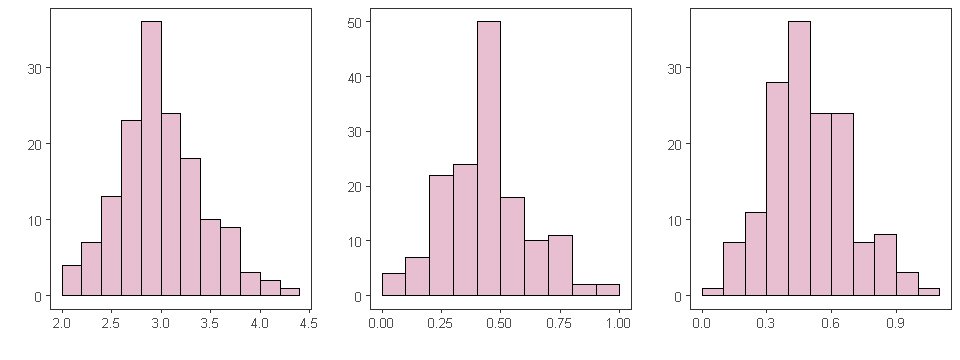

In [5]:
myirisM <- normalize.minmax(iris)

myirisZ <- normalize.zscore(iris, nmean = 0.5,nsd = 0.5/2.698)

grf <- plot.hist(iris %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1])
grfM <- plot.hist(myirisM$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1])
grfZ <- plot.hist(myirisZ$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1])

options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(grf, grfM, grfZ, ncol=3)
options(repr.plot.width=4, repr.plot.height=3)

## PCA

PC1,PC2,Species
2.640270,-5.204041,setosa
2.670730,-4.666910,setosa
2.454606,-4.773636,setosa
2.545517,-4.648463,setosa
2.561228,-5.258629,setosa
2.975946,-5.707321,setosa


,PC1,PC2
Sepal.Length,0.5210659,-0.37741762
Sepal.Width,-0.2693474,-0.92329566
Petal.Length,0.5804131,-0.02449161
Petal.Width,0.5648565,-0.06694199


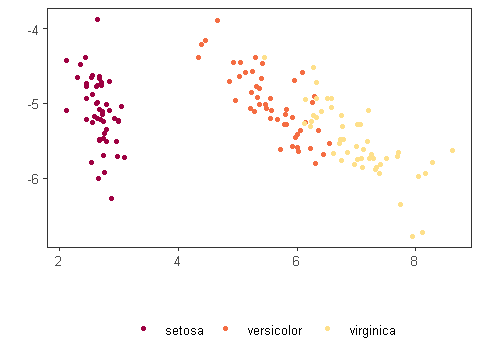

In [6]:
mypca <- dt.pca(iris, "Species")
head(mypca$pca)
head(mypca$transf$pca.transf)

plot.scatter(mypca$pca %>% select(x=PC1, value=PC2, variable=Species), colors=mycolors[1:3])

## Binning

In [7]:
atr <- iris$Sepal.Length
#atr <- iris$Petal.Width
label <- iris$Species

bi <- binning.interval(atr, n=2)
bf <- binning.freq(atr, n=2)
bc <- binning.cluster(atr, n=2)

print(c('interval: ', bi$interval, 'entropy: ', entropy_group(bi$bins_factor, label)))
print(c('freq: ', bf$interval, 'entropy: ', entropy_group(bf$bins_factor, label)))
print(c('cluster: ', bc$interval, 'entropy: ', entropy_group(bc$bins_factor, label)))

bi <- binning.opt(atr, binning=binning.interval)
bf <- binning.opt(atr, binning=binning.freq)
bc <- binning.opt(atr, binning=binning.cluster)

print(c('interval: ', bi$interval, 'entropy: ', entropy_group(bi$bins_factor, label)))
print(c('freq: ', bf$interval, 'entropy: ', entropy_group(bf$bins_factor, label)))
print(c('cluster: ', bc$interval, 'entropy: ', entropy_group(bc$bins_factor, label)))

[1] "interval: "       "4.3"              "6.1"              "7.9"             
[5] "entropy: "        "178.760086603411"
[1] "freq: "           "4.3"              "5.8"              "7.9"             
[5] "entropy: "        "164.635950375056"
[1] "cluster: "        "4.3"              "5.889375"         "7.9"             
[5] "entropy: "        "164.635950375056"
 [1] "interval: "       "4.3"              "4.9"              "5.5"             
 [5] "6.1"              "6.7"              "7.3"              "7.9"             
 [9] "entropy: "        "130.361912876848"
 [1] "freq: "           "4.3"              "5"                "5.4"             
 [5] "5.8"              "6.3"              "6.7"              "7.9"             
 [9] "entropy: "        "130.062182960522"
 [1] "cluster: "        "4.3"              "5.24333333333333" "5.81"            
 [5] "6.186"            "6.56810526315789" "7.14665071770335" "7.9"             
 [9] "entropy: "        "133.584805787317"


## Balancing datasets
O dataset myiris foi artificialmente desbalanceado. 
Duas técnicas para correção foram aplicadas: oversampling e subsampling.

In [8]:
#forçando um desbalançeamento
myiris <- iris[c(1:20,51:100, 110:120),]
myiris.bo <- balance.oversampling(myiris, "Species")
myiris.bs <- balance.subsampling(myiris, "Species")
tbl <- rbind(table(myiris$Species), table(myiris.bo$Species), table(myiris.bs$Species))
rownames(tbl) <- c('unbalanced', 'oversampling', 'subsampling')
head(tbl)

,setosa,versicolor,virginica
unbalanced,20,50,11
oversampling,50,50,50
subsampling,11,11,11


## Categorical mapping

In [9]:
mycm <- dt.categ_mapping(sampler$sample, "Species")
head(mycm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Speciessetosa,Speciesversicolor,Speciesvirginica
117,6.5,3.0,5.5,1.8,virginica,0,0,1
149,6.2,3.4,5.4,2.3,virginica,0,0,1
102,5.8,2.7,5.1,1.9,virginica,0,0,1
110,7.2,3.6,6.1,2.5,virginica,0,0,1
104,6.3,2.9,5.6,1.8,virginica,0,0,1
59,6.6,2.9,4.6,1.3,versicolor,0,1,0
